In [85]:
import pandas as pd
import matplotlib.pyplot as plt

In [186]:
df_see1 = pd.read_csv("./2016-us-election/county_facts.csv")
#X = df_see.drop("gene",axis=1).values.astype("int") # to drop the gene column and convert data to int
samples1 = df_see1.columns

In [182]:
samples1

Index(['fips', 'area_name', 'state_abbreviation', 'PST045214', 'PST040210',
       'PST120214', 'POP010210', 'AGE135214', 'AGE295214', 'AGE775214',
       'SEX255214', 'RHI125214', 'RHI225214', 'RHI325214', 'RHI425214',
       'RHI525214', 'RHI625214', 'RHI725214', 'RHI825214', 'POP715213',
       'POP645213', 'POP815213', 'EDU635213', 'EDU685213', 'VET605213',
       'LFE305213', 'HSG010214', 'HSG445213', 'HSG096213', 'HSG495213',
       'HSD410213', 'HSD310213', 'INC910213', 'INC110213', 'PVY020213',
       'BZA010213', 'BZA110213', 'BZA115213', 'NES010213', 'SBO001207',
       'SBO315207', 'SBO115207', 'SBO215207', 'SBO515207', 'SBO415207',
       'SBO015207', 'MAN450207', 'WTN220207', 'RTN130207', 'RTN131207',
       'AFN120207', 'BPS030214', 'LND110210', 'POP060210'],
      dtype='object')

In [183]:
df_see1.head()

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,...,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0


In [9]:
df_see2 = pd.read_csv("./2016-us-election/county_facts_dictionary.csv")
#X = df_see.drop("gene",axis=1).values.astype("int") # to drop the gene column and convert data to int
samples2 = df_see2.columns

In [10]:
df_see2.head()

,column_name,description
0,PST045214,"Population, 2014 estimate"
1,PST040210,"Population, 2010 (April 1) estimates base"
2,PST120214,"Population, percent change - April 1, 2010 to ..."
3,POP010210,"Population, 2010"
4,AGE135214,"Persons under 5 years, percent, 2014"


In [11]:
df_see2["description"]

0                             Population, 2014 estimate
1             Population, 2010 (April 1) estimates base
2     Population, percent change - April 1, 2010 to ...
3                                      Population, 2010
4                  Persons under 5 years, percent, 2014
5                 Persons under 18 years, percent, 2014
6              Persons 65 years and over, percent, 2014
7                         Female persons, percent, 2014
8                            White alone, percent, 2014
9        Black or African American alone, percent, 2014
10    American Indian and Alaska Native alone, perce...
11                           Asian alone, percent, 2014
12    Native Hawaiian and Other Pacific Islander alo...
13                     Two or More Races, percent, 2014
14                    Hispanic or Latino, percent, 2014
15    White alone, not Hispanic or Latino, percent, ...
16    Living in same house 1 year & over, percent, 2...
17             Foreign born persons, percent, 20

In [12]:
samples2

Index(['column_name', 'description'], dtype='object')

In [13]:
df_see3 = pd.read_csv("./2016-us-election/primary_results.csv")
#X = df_see.drop("gene",axis=1).values.astype("int") # to drop the gene column and convert data to int
samples3 = df_see3.columns

In [14]:
df_see3[df_see3["county"]=="Abbot"]

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
8121,Maine,ME,Abbot,92300001.0,Democrat,Bernie Sanders,1,1.0
8122,Maine,ME,Abbot,92300001.0,Democrat,Hillary Clinton,0,0.0


item: election 2016 fact

Attributes:the differentstats,'fips','area_name','state_abbreviation':categorical attributes
the other columns are quantitive attributes

state:categorical	
state_abbreviation:categorical	
county:categorical 
fips:quantitative	
party:categorical	
candidate:categorical	
votes:quantitative	
fraction_votes:quantitative

In [15]:
df_see3_manip = df_see3[["county","party","votes"]].groupby(["county","party"]).sum()

df_see3_manip['county'] = df_see3_manip.index
df_see3_manip.head()

votes                   county
county    party                                     
Abbeville Democrat     1813    (Abbeville, Democrat)
          Republican   3667  (Abbeville, Republican)
Abbot     Democrat        1        (Abbot, Democrat)
Abington  Democrat     2511     (Abington, Democrat)
          Republican   2049   (Abington, Republican)

In [16]:
counties = df_see3['county'].unique()
df = pd.DataFrame(columns = ['county'])
df['county'] = counties

In [17]:
df = df_see3[df_see3["party"]=="Democrat"]
df_democrats = df[["county", "votes"]].groupby(["county"]).sum()
df = df_see3[df_see3["party"]=="Republican"]
df_republicans = df[["county", "votes"]].groupby(["county"]).sum()

In [18]:
#df['Democrats'] = df_see3_manip[df_see3["party"]=="Democrat"]

In [19]:
counties = df_see3['county'].unique()
df = pd.DataFrame(columns = ['county'])
df['county'] = counties
df=df.set_index('county')
df['Democrat'] = df_democrats
df['Republican'] = df_republicans
df=df.fillna(0)

In [20]:
df['proportion'] = df['Democrat']/(df['Democrat']+df['Republican'])
df['democratWin'] = df['proportion']>0.5

In [21]:
df

,Democrat,Republican,proportion,democratWin
county,,,,
Autauga,2931.0,11839.0,0.198443,False
Baldwin,11783.0,53544.0,0.180370,False
Barbour,4469.0,5395.0,0.453062,False
Bibb,16764.0,19028.0,0.468373,False
Blount,6057.0,35487.0,0.145797,False
Bullock,2629.0,541.0,0.829338,True
Butler,45205.0,115176.0,0.281860,False
Calhoun,26301.0,46099.0,0.363273,False
Chambers,4191.0,11246.0,0.271491,False


In [22]:
df.to_csv('clean_data.csv')

Let's to join both datasets

In [212]:
#df_see1.rename(columns = {"county":"area_name"})
df_see1 = pd.read_csv("./2016-us-election/county_facts.csv")
df_see1["county"] = df_see1.area_name.str.replace(" County","")
df_see1["county"] = df_see1.county.str.replace(" city","")

In [213]:
df_see1.head()

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210,county
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,...,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4,United States
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,...,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4,Alabama
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,31.7,0,0,598175,12003,88157,131,594.44,91.8,Autauga
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,...,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6,Baldwin
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,...,27.0,0,0,188337,6334,0,8,884.88,31.0,Barbour


In [236]:
df_see3[df_see3["county"] == "Le Flore"]

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes


In [215]:
df_all = pd.merge(df_see1,df_see3,how = 'left', left_on=['state_abbreviation',"county"], right_on = ["state_abbreviation","county"])

In [216]:
df_all.head()

,fips_x,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,BPS030214,LND110210,POP060210,county,state,fips_y,party,candidate,votes,fraction_votes
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,...,1046363,3531905.43,87.4,United States,NaN,NaN,NaN,NaN,NaN,NaN
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,...,13369,50645.33,94.4,Alabama,NaN,NaN,NaN,NaN,NaN,NaN
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,131,594.44,91.8,Autauga,Alabama,1001.0,Democrat,Bernie Sanders,544.0,0.182
3,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,131,594.44,91.8,Autauga,Alabama,1001.0,Democrat,Hillary Clinton,2387.0,0.800
4,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,131,594.44,91.8,Autauga,Alabama,1001.0,Republican,Ben Carson,1764.0,0.146


In [218]:
# persons over 18 years old:

df_all["over_18"] = 100 - df_all["AGE135214"] - df_all["AGE295214"]

In [219]:
df_all["over_18"].head()

0    70.7
1    71.1
2    68.8
3    68.8
4    68.8
Name: over_18, dtype: float64

Let's see now the counties that voted more for Trump, their level of studies:

In [220]:
df_trump = df_all[df_all["candidate"]=="Donald Trump"]

In [221]:
df_trump["fraction_trump"] = df_trump["votes"]/((df_trump["PST045214"]*df_trump["over_18"])/100)

/Users/jonatanpinol/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [222]:
df_trump["fraction_trump"] 

5        0.141347
12       0.163469
19       0.087003
26       0.118105
33       0.182125
40       0.040219
47       0.120549
54       0.107209
61       0.087554
68       0.142588
75       0.172953
82       0.107802
89       0.128863
96       0.193812
103      0.198005
110      0.120432
117      0.097429
124      0.082922
131      0.147288
138      0.168803
145      0.150327
152      0.182431
159      0.119666
166      0.018412
173      0.127215
180      0.148069
187      0.103833
194      0.115814
201      0.201526
208      0.098689
           ...   
17542    0.155590
17547    0.109318
17552    0.090270
17557    0.113517
17562    0.093869
17567    0.111550
17572    0.096320
17577    0.156046
17582    0.086176
17587    0.112298
17592    0.090838
17597    0.153283
17602    0.113734
17607    0.104380
17612    0.165878
17617    0.141227
17622    0.079130
17627    0.145021
17632    0.118903
17637    0.119977
17642    0.191483
17647    0.099689
17652    0.162546
17657    0.100271
17662    0

In [223]:
df_trump_sorted = df_trump.sort_values(by = "fraction_trump", ascending = 0)

In [224]:
df_trump_sorted[["state","county","EDU685213","fraction_trump"]]

,state,county,EDU685213,fraction_trump
16589,Virginia,Bedford,25.0,inf
16652,Virginia,Fairfax,51.9,1.981783
16666,Virginia,Franklin,20.6,0.658619
8950,Montana,Petroleum,15.4,0.454261
8805,Montana,Carter,16.4,0.383242
8860,Montana,Garfield,13.0,0.381971
9486,Nebraska,Thomas,22.7,0.374541
8955,Montana,Phillips,15.9,0.367025
9246,Nebraska,Grant,17.7,0.365520
8965,Montana,Powder River,19.9,0.362203


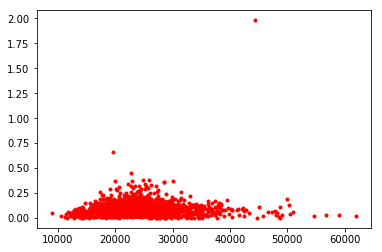

In [225]:
plt.plot(df_trump_sorted["INC910213"], df_trump_sorted["fraction_trump"],"r.")
plt.show()

# Most voted candidate per county

In [226]:
df_all["proportion_votes"] = df_all["votes"]/((df_all["PST045214"]*df_all["over_18"])/100)

In [233]:
df_all[df_all["county"]=="Le Flore"]

,fips_x,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,POP060210,county,state,fips_y,party,candidate,votes,fraction_votes,over_18,proportion_votes
11762,40079,Le Flore County,OK,49761,50384,-1.2,50384,6.1,24.0,16.9,...,31.7,Le Flore,NaN,NaN,NaN,NaN,NaN,NaN,69.9,NaN


In [228]:

df_votes = df_all[["state","county","candidate","votes"]].groupby(["county","candidate"]).max()#.sort_values(by="votes", ascending = 0)
df_votes
df_most_voted = df_all.sort_values(["votes"],ascending=False).groupby('county').head(1)
df_most_voted = df_most_voted[["state","county","candidate","votes","party"]]
df_most_voted.head()
df_most_voted.to_csv('most_voted.csv')


In [229]:
df_most_voted["candidate"].unique()

array(['Hillary Clinton', 'Donald Trump', 'Bernie Sanders', 'John Kasich',
       'Ted Cruz', 'Marco Rubio', nan], dtype=object)

In [230]:
df_candidate_number = pd.DataFrame({"candidate" : ['Hillary Clinton', 'Donald Trump', 'Bernie Sanders', 'John Kasich',
       'Ted Cruz', 'Marco Rubio'],"numbers" : [1,2,3,4,5,6]} )

In [231]:
df_most_voted = pd.merge(df_most_voted, df_candidate_number, how = "left", on = "candidate")

In [253]:
df_most_voted = df_most_voted.fillna(value = 7)

In [254]:
df_most_voted[df_most_voted["state"]==7]

,state,county,candidate,votes,party,numbers
1624,7,United States,7,7.0,7,7.0
1625,7,Alabama,7,7.0,7,7.0
1626,7,Alaska,7,7.0,7,7.0
1627,7,Aleutians East Borough,7,7.0,7,7.0
1628,7,Aleutians West Census Area,7,7.0,7,7.0
1629,7,Anchorage Municipality,7,7.0,7,7.0
1630,7,Bethel Census Area,7,7.0,7,7.0
1631,7,Bristol Bay Borough,7,7.0,7,7.0
1632,7,Denali Borough,7,7.0,7,7.0
1633,7,Dillingham Census Area,7,7.0,7,7.0
